# Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import re
from tabulate import tabulate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, plot_confusion_matrix, precision_score, recall_score,r2_score, mean_squared_error, f1_score
from sklearn.model_selection import cross_val_score

**Load Data Set**

In [2]:
df=pd.read_csv("arabic_dataset_classifiction.csv")
df

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0
...,...,...
111723,اللاعب تأخر في العودة إلى التداريب والمدرب غاض...,4
111724,المشرف العام لحسنية أكادير قال إنه سيغادر الفر...,4
111725,نسب إليه نتائج الوداد وصحوة الرجاء وآخر صيحاته...,4
111726,ستحتضن الرباط في الفترة مابين يوليوز المقبل دو...,4


# Data Preprocessing

**Stop Words**

In [6]:
from nltk.corpus import stopwords
", ".join(stopwords.words('arabic'))

'إذ, إذا, إذما, إذن, أف, أقل, أكثر, ألا, إلا, التي, الذي, الذين, اللاتي, اللائي, اللتان, اللتيا, اللتين, اللذان, اللذين, اللواتي, إلى, إليك, إليكم, إليكما, إليكن, أم, أما, أما, إما, أن, إن, إنا, أنا, أنت, أنتم, أنتما, أنتن, إنما, إنه, أنى, أنى, آه, آها, أو, أولاء, أولئك, أوه, آي, أي, أيها, إي, أين, أين, أينما, إيه, بخ, بس, بعد, بعض, بك, بكم, بكم, بكما, بكن, بل, بلى, بما, بماذا, بمن, بنا, به, بها, بهم, بهما, بهن, بي, بين, بيد, تلك, تلكم, تلكما, ته, تي, تين, تينك, ثم, ثمة, حاشا, حبذا, حتى, حيث, حيثما, حين, خلا, دون, ذا, ذات, ذاك, ذان, ذانك, ذلك, ذلكم, ذلكما, ذلكن, ذه, ذو, ذوا, ذواتا, ذواتي, ذي, ذين, ذينك, ريث, سوف, سوى, شتان, عدا, عسى, عل, على, عليك, عليه, عما, عن, عند, غير, فإذا, فإن, فلا, فمن, في, فيم, فيما, فيه, فيها, قد, كأن, كأنما, كأي, كأين, كذا, كذلك, كل, كلا, كلاهما, كلتا, كلما, كليكما, كليهما, كم, كم, كما, كي, كيت, كيف, كيفما, لا, لاسيما, لدى, لست, لستم, لستما, لستن, لسن, لسنا, لعل, لك, لكم, لكما, لكن, لكنما, لكي, لكيلا, لم, لما, لن, لنا, له, لها, لهم, لهما, لهن, لو, لولا, لوما,

**Remove Stopwords**

In [7]:
STOPWORDS = set(stopwords.words('arabic'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['text'] =df['text'].apply(lambda text: remove_stopwords(text))
df.head()

,text,targe
0,أستوديوهات ورزازات وصحراء مرزوكة وآثار وليلي ا...,0
1,قررت النجمة الأمريكية أوبرا وينفري يقتصر عملها...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود المغرب تتبع الطريقة التقليدي...,0


**Count Common Words**

In [8]:
from collections import Counter
cnt = Counter()
for text in df['text'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('خلال', 79236),
 ('المغرب', 78382),
 ('الفريق', 71327),
 ('أنه', 65655),
 ('المغربية', 61299),
 ('الوطني', 52323),
 ('محمد', 46128),
 ('الماضي', 43400),
 ('الرياضي', 42982),
 ('عبد', 42146)]

**Remove Freqwords**

In [9]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df['text'] =df['text'].apply(lambda text: remove_freqwords(text))
df.head()

,text,targe
0,أستوديوهات ورزازات وصحراء مرزوكة وآثار وليلي ا...,0
1,قررت النجمة الأمريكية أوبرا وينفري يقتصر عملها...,0
2,أخبارنا الوزاني تصوير الشملالي ألهب النجم المغ...,0
3,اخبارنا قال ابراهيم الراشدي محامي سعد المجرد ا...,0
4,تزال صناعة الجلود تتبع الطريقة التقليدية واليد...,0


**Remove Rarewords**

In [10]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df['text'] =df['text'].apply(lambda text: remove_rarewords(text))
df.head()

,text,targe
0,أستوديوهات ورزازات وصحراء مرزوكة وآثار وليلي ا...,0
1,قررت النجمة الأمريكية أوبرا وينفري يقتصر عملها...,0
2,أخبارنا الوزاني تصوير الشملالي ألهب النجم المغ...,0
3,اخبارنا قال ابراهيم الراشدي محامي سعد المجرد ا...,0
4,تزال صناعة الجلود تتبع الطريقة التقليدية واليد...,0


**Remove Urls and Htmls**

In [11]:

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df['text']= df['text'].apply(lambda text: remove_urls(text))
df
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
df['text'] =df['text'].apply(lambda text: remove_html(text))
df.head()

,text,targe
0,أستوديوهات ورزازات وصحراء مرزوكة وآثار وليلي ا...,0
1,قررت النجمة الأمريكية أوبرا وينفري يقتصر عملها...,0
2,أخبارنا الوزاني تصوير الشملالي ألهب النجم المغ...,0
3,اخبارنا قال ابراهيم الراشدي محامي سعد المجرد ا...,0
4,تزال صناعة الجلود تتبع الطريقة التقليدية واليد...,0


**Model Evaluation**

In [12]:
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(5,5))
    
    
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results


**Separate Data Into Features(x) and labels(y)** 

In [4]:
x=df.iloc[:,0]
y=df.iloc[:,1]
y=y.replace(np.nan,0)

**Split Data Into Train And Test**

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

**Apply CountVectorizer Into Traning Data**

In [14]:
ct=CountVectorizer()
x_train=ct.fit_transform(x_train)
x_test=ct.transform(x_test)
print(x_train.shape,x_test.shape)

(74857, 353488) (36871, 353488)


# Apply Machine Learning Models

**Decision Tree Classsifier**

========== Decision Tree Classifier ==========

Accuracy on validation set: 0.8897

Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      4531
           1       0.90      0.91      0.90      5415
           2       0.76      0.78      0.77      4665
           3       0.81      0.81      0.81      6888
           4       0.97      0.97      0.97     15372

    accuracy                           0.89     36871
   macro avg       0.86      0.86      0.86     36871
weighted avg       0.89      0.89      0.89     36871


Confusion Matrix : 
 [[ 3778    90   222   299   142]
 [   83  4908   128   221    75]
 [  166    87  3621   687   104]
 [  233   293   640  5611   111]
 [  166   100   129    91 14886]]


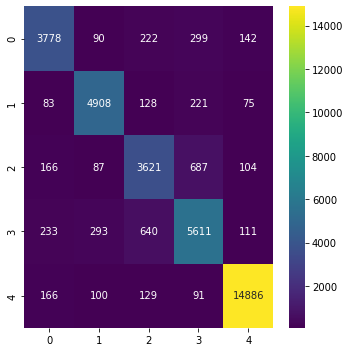

In [15]:
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
result_dt = modelEvaluation(y_pred_dt, y_test, 'Decision Tree Classifier')

**KNeighbor

========== KNeighborsClassifier ==========

Accuracy on validation set: 0.5523

Classification report : 
               precision    recall  f1-score   support

           0       0.48      0.50      0.49      4531
           1       0.97      0.33      0.49      5415
           2       0.29      0.59      0.38      4665
           3       0.47      0.70      0.56      6888
           4       0.84      0.57      0.68     15372

    accuracy                           0.55     36871
   macro avg       0.61      0.54      0.52     36871
weighted avg       0.68      0.55      0.57     36871


Confusion Matrix : 
 [[2285    8  944  994  300]
 [ 457 1768 1456  837  897]
 [ 442    9 2758 1188  268]
 [ 631   28 1237 4790  202]
 [ 986   11 3268 2343 8764]]


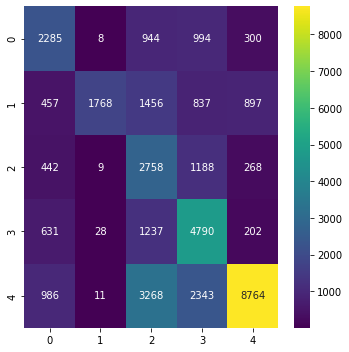

In [16]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
result_knn = modelEvaluation(y_pred_knn, y_test, 'KNeighborsClassifier')

+-----------+-----------------+------------------+
| Metrics   |   Decision tree |   KNN Classifier |
|-----------+-----------------+------------------|
| accuracy  |        0.889697 |         0.552331 |
| precision |        0.859478 |         0.608535 |
| recall    |        0.859876 |         0.537511 |
| f1-score  |        0.859637 |         0.520933 |
+-----------+-----------------+------------------+


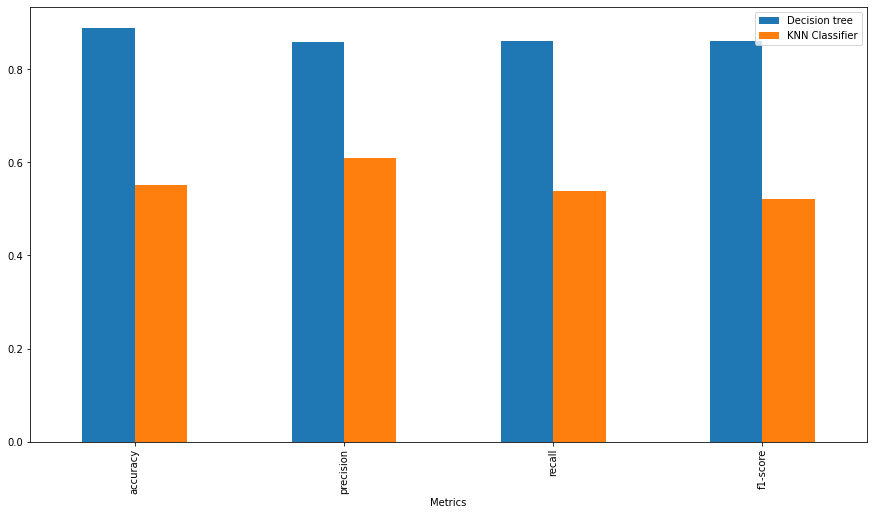

In [17]:
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' :result_dt,
    'KNN Classifier':result_knn,
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))
metrics_df.plot(kind='bar', figsize=(15,8))
plt.show()

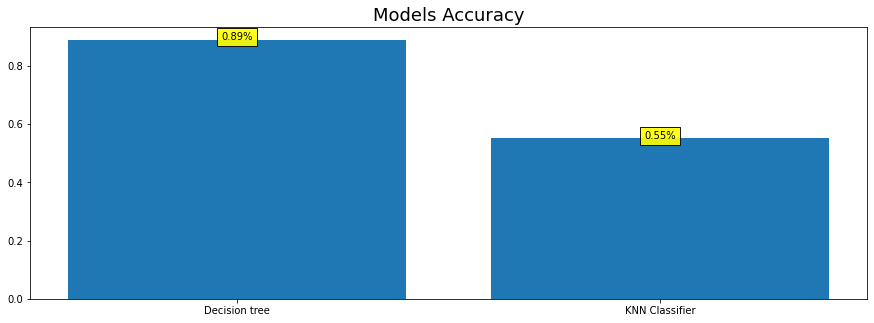

In [18]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()